In [1]:
!pip install pandas scikit-learn tensorflow==1.15

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 412.3 MB 45 kB/s s eta 0:00:01   |██▏                             | 28.5 MB 5.0 MB/s eta 0:01:18�█████████▌                 | 186.6 MB 42.3 MB/s eta 0:00:06
     |████████████████████████████████| 69 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 104 kB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 15.9 MB/s eta 0:00:01
    

In [135]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        print(value)
        return False
    

In [84]:
raw_data = load_boston()

features_names = list()

for feature in raw_data['feature_names']:
    features_names.append(feature)
features_names.append('FEATURE')

print(features_names)

data = pd.DataFrame(data= np.c_[raw_data['data'], raw_data['target']], columns=features_names)



['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'FEATURE']


In [85]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,FEATURE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [86]:
for i in raw_data['data']:
    for value in i:
        if not is_number(value):
            print(value)

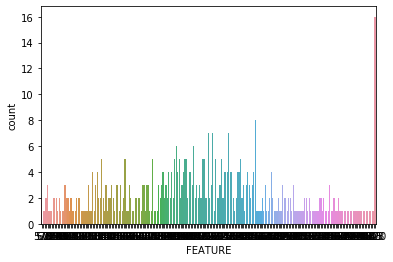

In [87]:
sns.countplot(data=data, x='FEATURE')

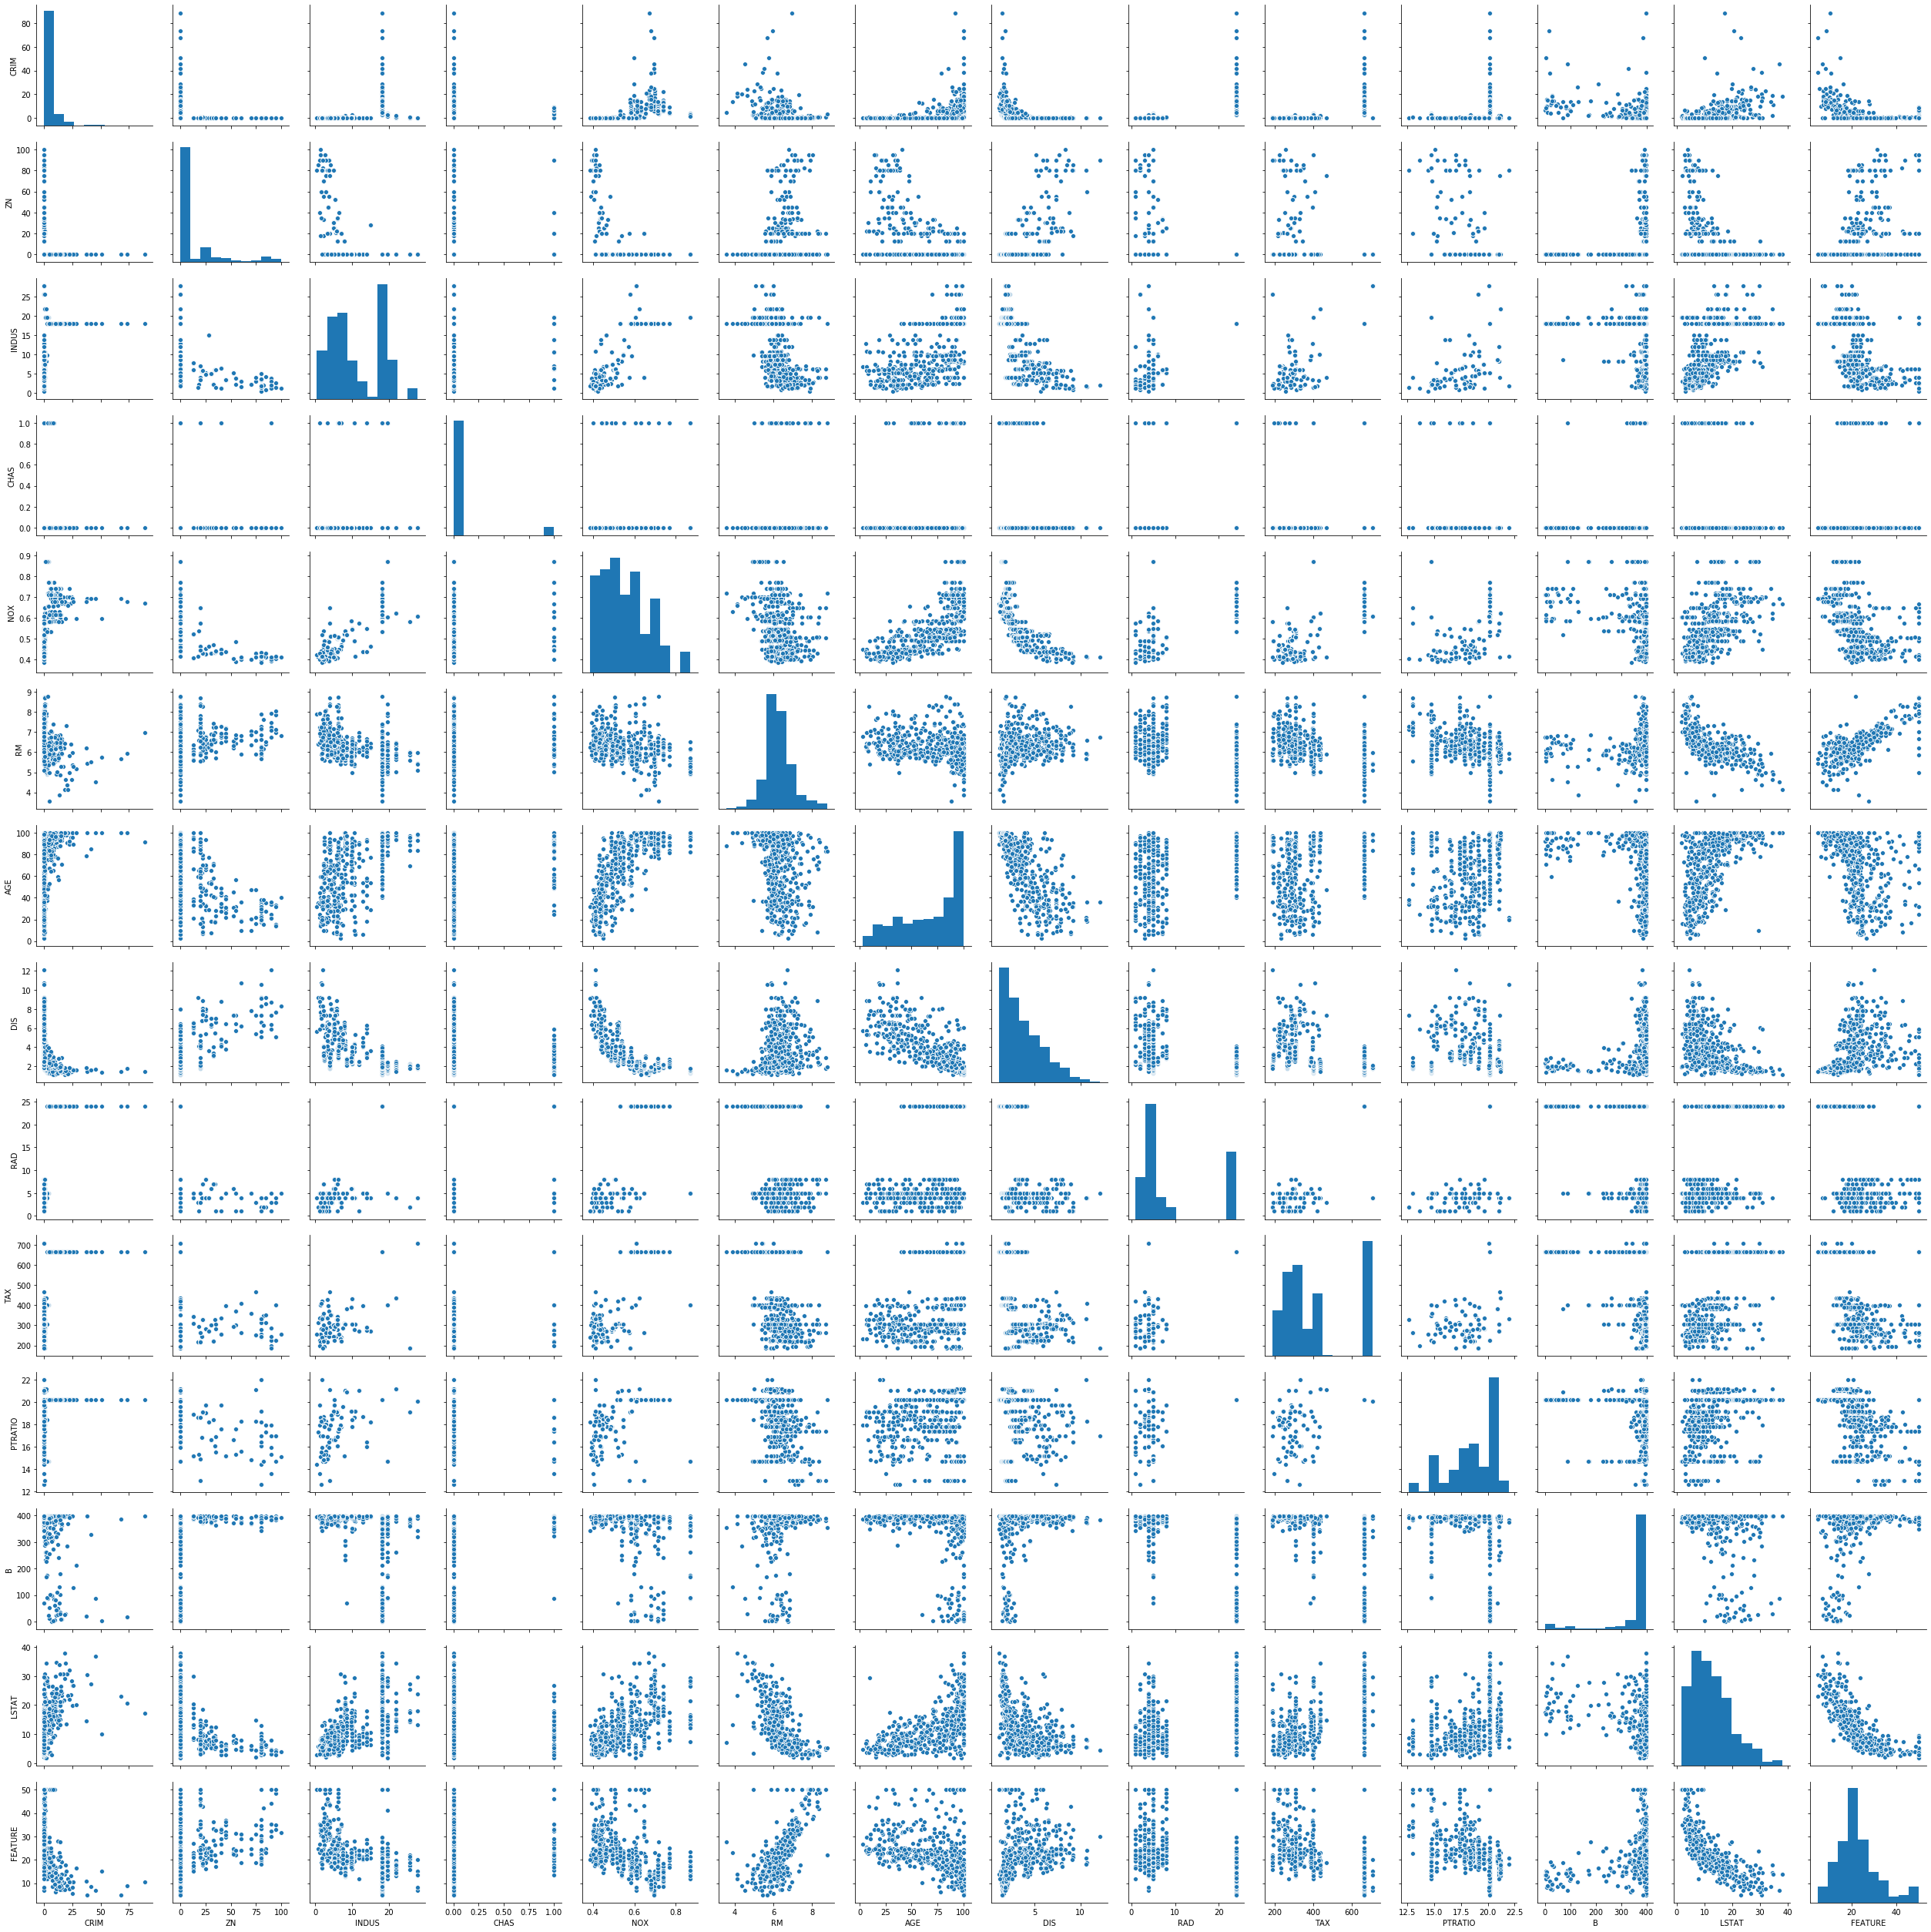

In [88]:
sns.pairplot(data=data)

In [112]:
classes = data['FEATURE']
features = data['AGE']

X = np.asarray(features)
Y = np.asarray(classes)

n_samples = X.shape[0]

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

n_samples_train = X_train.shape[0]
n_samples_test = Y_train.shape[0]


[24.  22.8 23.6 29.9 15.  22.  24.6 27.9 43.8 19.  50.  22.3 19.6 34.9
 37.  21.2 22.6 50.  30.8 18.7 30.5 24.2 22.8 28.2 36.2 22.5 17.8 26.2
 21.9 20.5 19.6 18.3 23.7 22.   8.8 21.6 22.2 34.9 25.2 31.5 48.3 24.7
 13.4 19.5  7.  22.4 20.  14.  13.  21.7 17.  41.3 44.  16.2 21.5 21.7
 14.5 20.4 15.1  7.2 10.4 28.7 25.  33.1 16.2 22.  29.6 20.3 29.8 23.1
 22.2 21.8 20.  33.8 31.1 37.9  8.8 14.9 42.3 19.3 11.7 12.  19.1 30.3
 22.7 20.7 16.1  7.2 10.2 23.8 13.4 17.4 21.5 20.1 20.3 22.8 13.1 32.
  6.3 17.8 16.7 22.6 13.1 17.3 16.4 50.  11.9 23.1 13.9 35.4 29.  13.8
 16.1 27.1 21.7 12.8 32.5 20.2 50.   8.3 34.7 14.6 22.4 13.1 19.8 23.9
 22.6 14.4 16.8 12.3 17.1 50.  13.6 28.4 22.8 23.9 24.5 24.8 18.8 26.5
  8.3 15.7 21.4 29.  18.2 19.4  5.6 25.  22.2 15.2 19.4 50.  38.7 24.4
 37.2 16.7  8.1 31.7 23.9 18.5 24.3 13.5 19.6 24.4 15.6 20.5 36.2 13.8
 20.2 18.7 20.8 35.4 30.7 19.4 13.4 20.6 19.3 15.3 14.5 13.8 17.5 24.4
 10.8 22.2 20.4 20.8 35.2 33.3 25.  32.2 19.4  7.5 37.6 29.8 22.6 17.6
 39.8 2

In [168]:
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")

y_intercept_pred = tf.Variable(np.random.randn(), name="y_intercept")
slope_pred = tf.Variable(np.random.randn(), name="slope")

y_pred = tf.add(tf.multiply(X, slope_pred), y_intercept_pred)

cost = tf.reduce_sum(tf.pow(y_pred-Y, 2))/(2 * n_samples_train)

learning_rate = 0.06
training_epochs = 1600

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 25
Epoch: 50
Epoch: 75
Epoch: 100
Epoch: 125
Epoch: 150
Epoch: 175
Epoch: 200
Epoch: 225
Epoch: 250
Epoch: 275
Epoch: 300
Epoch: 325
Epoch: 350
Epoch: 375
Epoch: 400
Epoch: 425
Epoch: 450
Epoch: 475
Epoch: 500
Epoch: 525
Epoch: 550
Epoch: 575
Epoch: 600
Epoch: 625
Epoch: 650
Epoch: 675
Epoch: 700
Epoch: 725
Epoch: 750
Epoch: 775
Epoch: 800
Epoch: 825
Epoch: 850
Epoch: 875
Epoch: 900
Epoch: 925
Epoch: 950
Epoch: 975
Epoch: 1000
Epoch: 1025
Epoch: 1050
Epoch: 1075
Epoch: 1100
Epoch: 1125
Epoch: 1150
Epoch: 1175
Epoch: 1200
Epoch: 1225
Epoch: 1250
Epoch: 1275
Epoch: 1300
Epoch: 1325
Epoch: 1350
Epoch: 1375
Epoch: 1400
Epoch: 1425
Epoch: 1450
Epoch: 1475
Epoch: 1500
Epoch: 1525
Epoch: 1550
Epoch: 1575
Epoch: 1600
Coste de entrenamiento: 45.724663 con a=-0.15764092 y b=29.115562


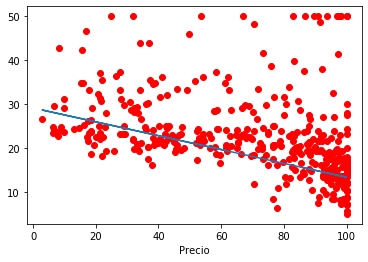

In [169]:
init = tf.global_variables_initializer()

with tf.Session() as session:
    
    session.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, Y_train):
            session.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch + 1) % 25 == 0:
            print("Epoch: " + str(epoch+1))

    training_cost = session.run(cost, feed_dict={X: X_train, Y: Y_train})
    
    slope = session.run(slope_pred)
    y_intercept = session.run(y_intercept_pred)
    
    ys = slope * X_train + y_intercept
    
    print("Coste de error: " + str(training_cost) + " con a=" + str(slope) + " y b=" + str(y_intercept))
    
    plt.plot(X_train, Y_train, 'ro', label='Predicción')
    plt.xlabel("Edad")
    plt.xlabel("Precio")

    plt.plot(X_train, ys, label="Recta de regresión")
    plt.show()
    
    

In [170]:
    sum = 0
    
    for i in range(0, len(x_test)):
        value_pred = slope * x_test[i] + y_intercept
        diff = math.pow(value_pred - y_test[i], 2)
        sum += diff / (2 * len(x_test))
        
    print(sum / len(x_test))

0.4430791308787672
